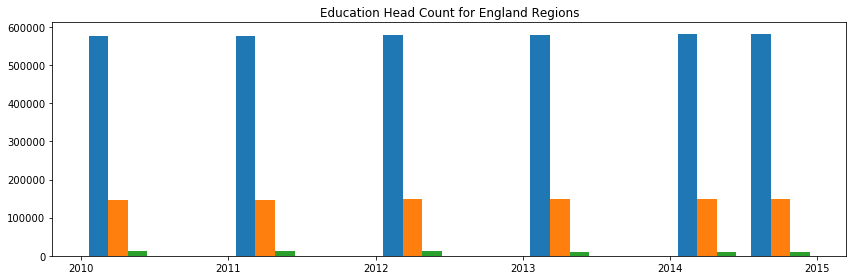

In [1]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
client = MongoClient()
db = client.test
collection = db['EducationHeadCount']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)
head = result['Period_label'].str.replace('/..', '')
head = head.map(lambda x: x.rstrip(' (academic)'))
fig, (ay1) = plt.subplots(ncols=1, figsize=(12, 4))

y = result['England'].as_matrix().astype(int)
x = head.as_matrix().astype(int)
ay1.hist([x,x,x], histtype='bar', weights =[result['England'].as_matrix().astype(int),result['Maximum_english_regions'].as_matrix().astype(int),result['Minimum_english_regions'].as_matrix().astype(int)], rwidth=0.8)
ay1.set_title('Education Head Count for England Regions')

fig.tight_layout()
plt.show()